In [1]:
# 1.
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/bankPortfolios.csv',header=None)
df.columns = df.columns.astype(str)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2699.0,6107.00,9965.0,1036.00,2924.0,3786.00,4573.0,1087.00,617.000,76.827,769.0,1828.2,381.0,933.0,32673.0,1
1,759920.0,6480.00,588660.0,528110.00,1188700.0,169400.00,174890.0,10210.00,6566.000,21101.000,211210.0,428740.0,82487.0,68882.0,3770300.0,1
2,129080.0,729.00,72972.0,3310.00,73909.0,34.00,44928.0,32995.00,409.000,502.000,15599.0,57902.0,20800.0,12168.0,423250.0,1
3,57828.0,1449.80,27634.0,1739.00,39274.0,1838.30,9854.0,1900.00,321.000,228.980,2291.9,7696.0,4609.0,7823.0,145830.0,1
4,1021.0,14222.00,3186.0,35.00,4776.0,29645.00,9295.0,3245.00,493.000,215.000,4932.0,20818.0,891.0,3661.0,87600.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7778,1922.1,1047.80,3587.5,401.39,3242.4,1328.60,2094.4,1002.20,92.600,165.490,1656.5,7987.0,543.0,517.0,8514.0,0
7779,1424.2,776.41,2658.2,297.42,755.0,984.45,598.0,742.63,68.614,122.620,1227.4,1838.0,207.0,256.0,681.0,0
7780,5931.1,3233.30,11070.0,1238.60,10005.0,4099.70,6462.9,3092.60,285.740,510.660,5111.4,12152.0,593.0,1352.0,14020.0,0
7781,8914.9,1300.00,374.0,512.00,7300.0,6162.20,1840.0,75.00,429.490,767.560,7682.9,971.0,4750.0,361.0,21573.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7783 entries, 0 to 7782
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7783 non-null   float64
 1   1       7783 non-null   float64
 2   2       7783 non-null   float64
 3   3       7783 non-null   float64
 4   4       7783 non-null   float64
 5   5       7783 non-null   float64
 6   6       7783 non-null   float64
 7   7       7783 non-null   float64
 8   8       7783 non-null   float64
 9   9       7783 non-null   float64
 10  10      7783 non-null   float64
 11  11      7783 non-null   float64
 12  12      7783 non-null   float64
 13  13      7783 non-null   float64
 14  14      7783 non-null   float64
 15  15      7783 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 973.0 KB


In [4]:
statistics = df.describe().round(1)
display(statistics)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,7783.0,7783.0,7783.0,7783.0,7783.0,7783.0,7783.0,7783.0,7783.0,7783.0,7783.0,7783.0,7783.0,7783.0,7.783000e+03,7783.0
mean,99533.4,31805.1,392991.2,23783.3,158593.0,28819.9,206262.2,173651.7,36335.4,12679.5,99211.8,285460.1,18664.2,63848.6,1.457557e+06,0.0
std,1053880.4,645724.8,9295027.1,369962.1,1771228.6,505062.6,3939996.4,4403194.7,1265055.3,249974.1,2298864.0,5865458.0,314380.4,1397252.5,2.630137e+07,0.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0
25%,1450.0,860.1,6525.0,390.0,4839.0,783.0,3922.0,1547.0,40.0,149.4,1264.4,6939.0,716.8,2086.5,5.206950e+04,0.0
50%,6951.0,2903.0,18935.0,1351.0,18690.0,2899.0,10483.0,3814.0,152.0,502.0,3996.0,18762.0,2306.0,4381.0,1.149900e+05,0.0
75%,29935.5,8127.6,50382.0,4924.0,56926.0,8647.2,28754.5,9271.0,667.6,1688.0,11516.5,48201.0,6055.5,9651.5,2.713500e+05,0.0
max,44848000.0,39519000.0,491760000.0,20757000.0,75654000.0,31000000.0,236070000.0,280340000.0,95991000.0,16022000.0,162060000.0,326330000.0,18487000.0,86182000.0,1.212500e+09,1.0


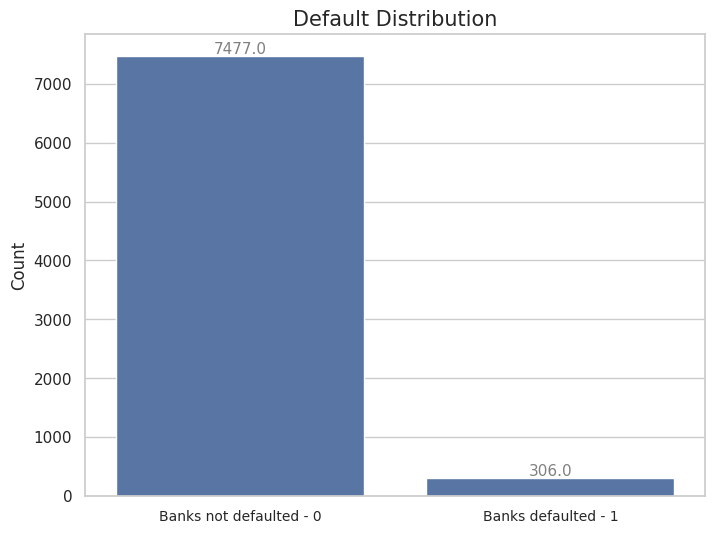

In [5]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='15', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                textcoords='offset points')

plt.title('Default Distribution', fontsize=15)
plt.ylabel('Count', fontsize=12)
plt.xlabel('')
plt.xticks([0, 1], ['Banks not defaulted - 0', 'Banks defaulted - 1'], fontsize=10)
plt.show()

In [6]:
X = df.drop('15', axis=1)
y = df['15']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
## Since this is an imbalanced dataset, so use SMOTE to oversample the minority
os = SMOTE(random_state=0)

columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['15'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of bank no default in oversampled data",len(os_data_y[os_data_y['15']==0]))
print("Number of default",len(os_data_y[os_data_y['15']==1]))
print("Proportion of no default data in oversampled data is ",len(os_data_y[os_data_y['15']==0])/len(os_data_X))
print("Proportion of default data in oversampled data is ",len(os_data_y[os_data_y['15']==1])/len(os_data_X))

length of oversampled data is  10484
Number of bank no default in oversampled data 5242
Number of default 5242
Proportion of no default data in oversampled data is  0.5
Proportion of default data in oversampled data is  0.5


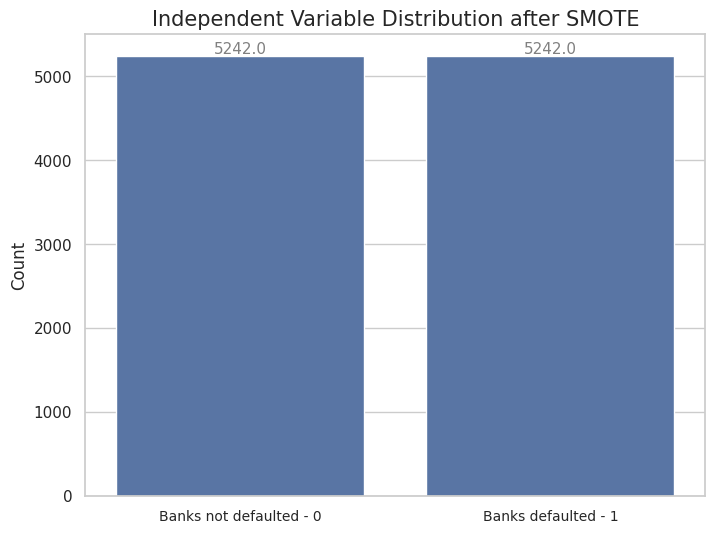

In [11]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='15', data=os_data_y)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                textcoords='offset points')

plt.title('Independent Variable Distribution after SMOTE', fontsize=15)
plt.ylabel('Count', fontsize=12)
plt.xlabel('')
plt.xticks([0, 1], ['Banks not defaulted - 0', 'Banks defaulted - 1'], fontsize=10)
plt.show()

In [12]:
display(os_data_X.describe().round(1))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,10484.0,10484.0,10484.0,10484.0,10484.0,10484.0,10484.0,10484.0,10484.0,10484.0,10484.0,10484.0,10484.0,10484.0,1.048400e+04
mean,133663.6,24066.4,252727.3,29941.8,154100.3,21271.8,133261.7,95483.9,17043.7,10250.3,65060.9,202728.0,14918.8,41685.6,1.068585e+06
std,794003.0,484156.1,6685319.5,313097.4,1256756.0,306465.4,2393162.0,3192953.8,548789.4,185678.7,1900679.8,4558642.9,198038.9,1055396.5,1.869431e+07
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
25%,4383.1,1086.1,8154.9,749.7,10398.6,1223.8,6037.9,1514.9,77.9,221.4,1996.4,7634.3,1216.6,2324.8,6.920750e+04
50%,23139.4,2836.1,23402.6,2557.1,32754.5,3210.5,17254.7,3601.4,246.0,592.5,4614.1,20737.7,3506.6,5228.7,1.691211e+05
75%,90112.0,7833.1,56696.3,8685.6,98052.8,8841.0,41856.9,8055.1,1051.1,2134.0,13590.6,54284.8,8274.2,10975.8,3.929328e+05
max,39493000.0,39519000.0,491760000.0,20757000.0,72402000.0,26573000.0,179520000.0,280340000.0,48500000.0,16022000.0,162060000.0,326330000.0,13281000.0,86182000.0,1.204300e+09


### **Logistics Regression**

In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(os_data_X, os_data_y)

y_lr_pred = lr.predict(X_test)

In [ ]:
lr_precision = precision_score(y_test, y_lr_pred, average='macro')
print("Precision:", lr_precision)

Precision: 0.593658591723252


In [ ]:
lr_accuracy = accuracy_score(y_test, y_lr_pred)
print("Accuracy:", lr_accuracy)

Accuracy: 0.862526766595289


In [ ]:
lr_recall = recall_score(y_test, y_lr_pred)
print("Recall:", lr_recall)

Recall: 0.74


In [ ]:
lr_f1 = f1_score(y_test, y_lr_pred)
print("F1 Score:", lr_f1)

F1 Score: 0.31556503198294245


In [ ]:
lr_cr = classification_report(y_test, y_lr_pred)
print(lr_cr)

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      2235
           1       0.20      0.74      0.32       100

    accuracy                           0.86      2335
   macro avg       0.59      0.80      0.62      2335
weighted avg       0.95      0.86      0.90      2335



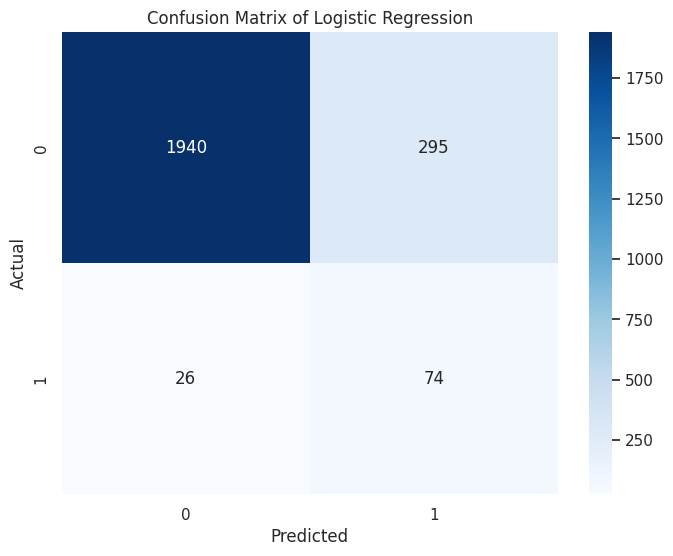

In [ ]:
lr_conf_matrix = confusion_matrix(y_test, y_lr_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(lr_conf_matrix, annot=True, fmt="d", cmap='Blues',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

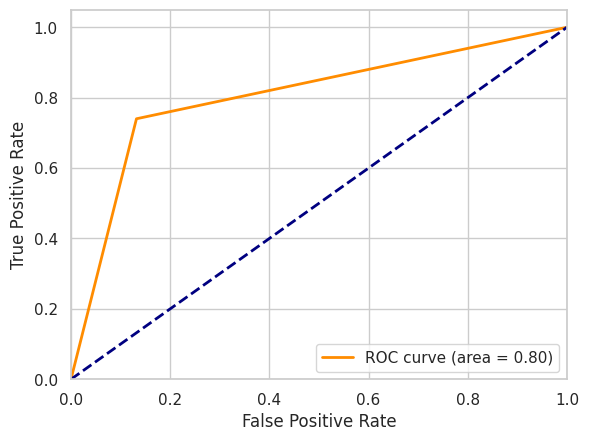

In [ ]:
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, y_lr_pred)
lr_roc_auc = auc(lr_fpr, lr_tpr)
# Plotting the ROC Curve
plt.figure()
plt.plot(lr_fpr, lr_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### **Random Forest**

In [ ]:
rf_parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10], 'n_estimators':[1,2,3,4,5,6,7,8,9,10]}
rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, rf_parameters)
rf_cv.fit(os_data_X, os_data_y)
y_rf_pred = rf_cv.predict(X_test)

In [ ]:
rf_cv.best_params_

{'max_depth': 10, 'n_estimators': 9}

In [ ]:
rf_precision = precision_score(y_test, y_rf_pred, average='macro')
print("Precision:", rf_precision)

Precision: 0.5693365681006859


In [ ]:
rf_accuracy = accuracy_score(y_test, y_rf_pred)
print("Accuracy:", rf_accuracy)

Accuracy: 0.862526766595289


In [ ]:
rf_recall = recall_score(y_test, y_rf_pred)
print("Recall:", rf_recall)

Recall: 0.53


In [ ]:
rf_f1 = f1_score(y_test, y_rf_pred)
print("F1 Score:", rf_f1)

F1 Score: 0.24824355971896955


In [ ]:
rf_cr = classification_report(y_test, y_rf_pred)
print(rf_cr)

              precision    recall  f1-score   support

           0       0.98      0.88      0.92      2235
           1       0.16      0.53      0.25       100

    accuracy                           0.86      2335
   macro avg       0.57      0.70      0.59      2335
weighted avg       0.94      0.86      0.90      2335



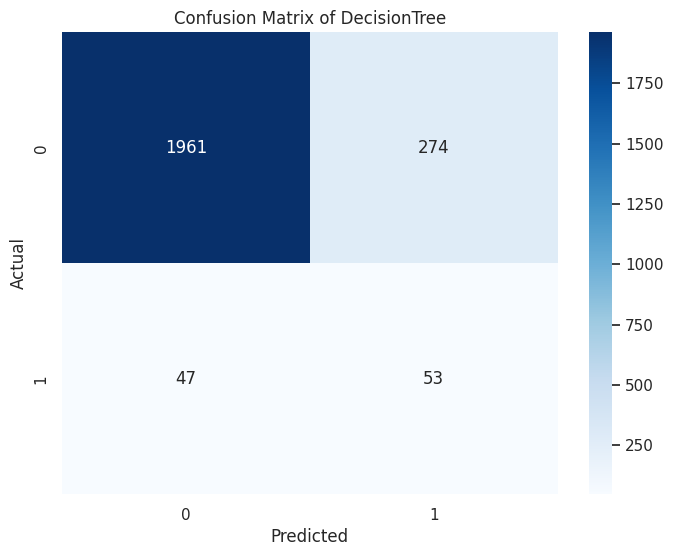

In [ ]:
rf_conf_matrix = confusion_matrix(y_test, y_rf_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap='Blues',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix of DecisionTree')
plt.show()

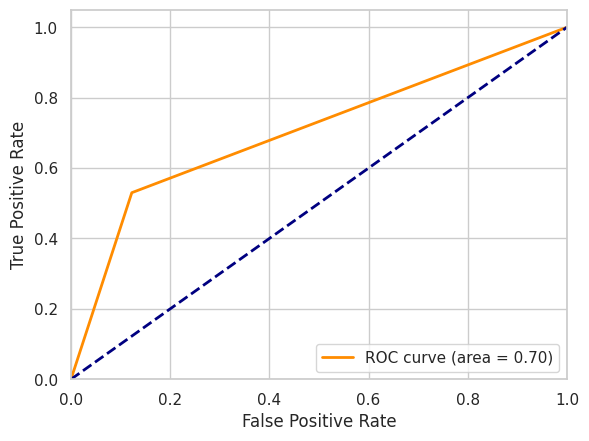

In [ ]:
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, y_rf_pred)
rf_roc_auc = auc(rf_fpr, rf_tpr)
# Plotting the ROC Curve
plt.figure()
plt.plot(rf_fpr, rf_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### **Decision Tree**

In [ ]:
dt_parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
dt = DecisionTreeClassifier()
dt_cv = GridSearchCV(dt, dt_parameters)
dt_cv.fit(os_data_X, os_data_y)
y_dt_pred = dt_cv.predict(X_test)

In [ ]:
dt_cv.best_params_

{'max_depth': 10}

In [ ]:
dt_precision = precision_score(y_test, y_dt_pred, average='macro')
print("Precision:", dt_precision)

Precision: 0.5494175626084736


In [ ]:
dt_accuracy = accuracy_score(y_test, y_dt_pred)
print("Accuracy:", dt_accuracy)

Accuracy: 0.8282655246252677


In [ ]:
dt_recall = recall_score(y_test, y_dt_pred)
print("Recall:", dt_recall)

Recall: 0.5


In [ ]:
dt_f1 = f1_score(y_test, y_dt_pred)
print("F1 Score:", dt_f1)

F1 Score: 0.1996007984031936


In [ ]:
dt_cr = classification_report(y_test, y_dt_pred)
print(dt_cr)

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      2235
           1       0.12      0.50      0.20       100

    accuracy                           0.83      2335
   macro avg       0.55      0.67      0.55      2335
weighted avg       0.94      0.83      0.87      2335



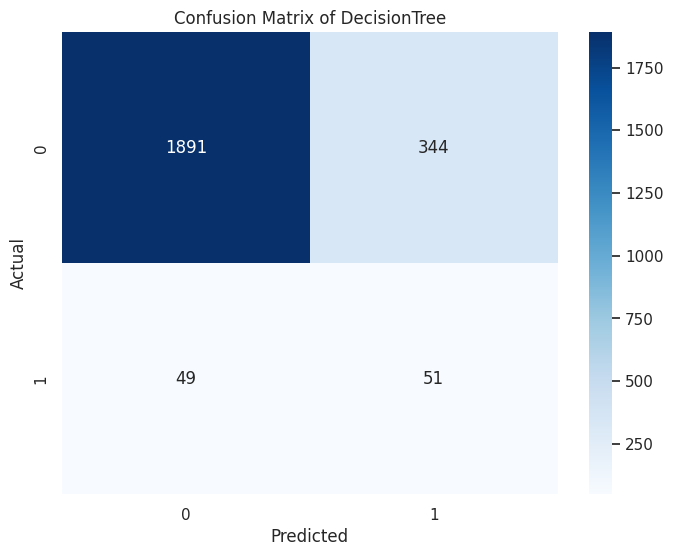

In [ ]:
dt_conf_matrix = confusion_matrix(y_test, y_dt_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt="d", cmap='Blues',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix of DecisionTree')
plt.show()

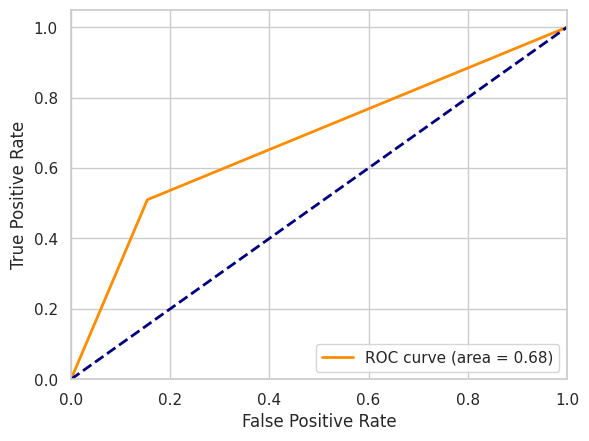

In [ ]:
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, y_dt_pred)
dt_roc_auc = auc(dt_fpr, dt_tpr)
# Plotting the ROC Curve
plt.figure()
plt.plot(dt_fpr, dt_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### **Gradient Boosting**

In [ ]:
# GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(os_data_X, os_data_y)
y_gb_pred = gb.predict(X_test)

In [ ]:
gb_precision = precision_score(y_test, y_gb_pred, average='macro')
print("Precision:", gb_precision)

Precision: 0.5728340520882885


In [ ]:
gb_accuracy = accuracy_score(y_test, y_gb_pred)
print("Accuracy:", gb_accuracy)

Accuracy: 0.8428265524625268


In [ ]:
gb_recall = recall_score(y_test, y_gb_pred)
print("Recall:", gb_recall)

Recall: 0.65


In [ ]:
gb_f1 = f1_score(y_test, y_gb_pred)
print("F1 Score:", gb_f1)

F1 Score: 0.26156941649899396


In [ ]:
gb_cr = classification_report(y_test, y_gb_pred)
print(gb_cr)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      2235
           1       0.16      0.65      0.26       100

    accuracy                           0.84      2335
   macro avg       0.57      0.75      0.59      2335
weighted avg       0.95      0.84      0.88      2335



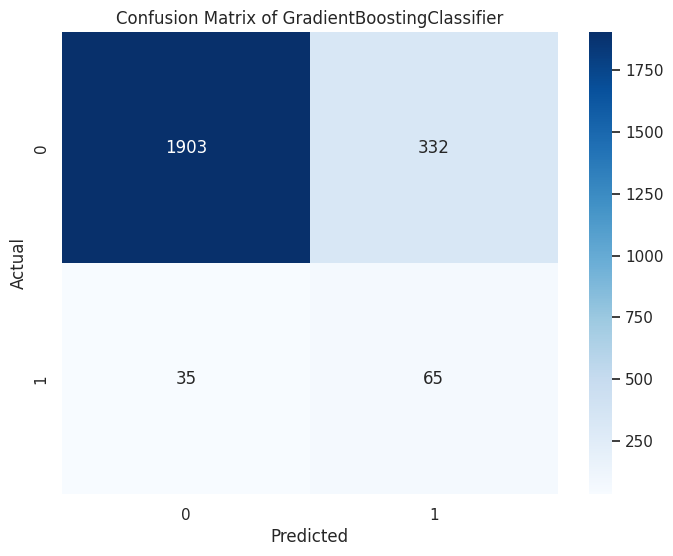

In [ ]:
gb_conf_matrix = confusion_matrix(y_test, y_gb_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(gb_conf_matrix, annot=True, fmt="d", cmap='Blues',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix of GradientBoostingClassifier')
plt.show()

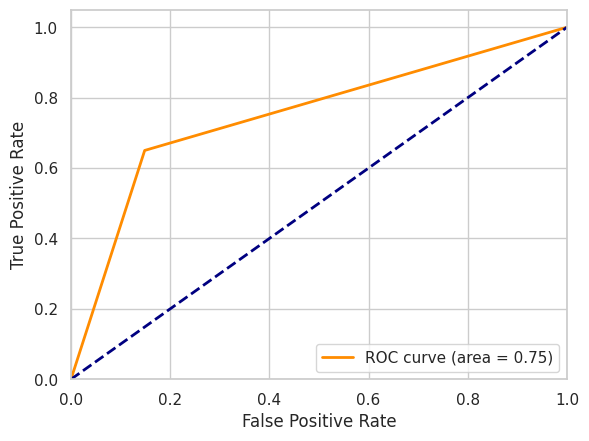

In [ ]:
gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_test, y_gb_pred)
gb_roc_auc = auc(gb_fpr, gb_tpr)
# Plotting the ROC Curve
plt.figure()
plt.plot(gb_fpr, gb_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % gb_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
final = pd.DataFrame({
    'Model':['Logistic Regression', 'Random Forest', 'Decision Tree','Gradient Boosting'],
    'Accuracy': [lr_accuracy, rf_accuracy, dt_accuracy, gb_accuracy],
    'Recall': [lr_recall, rf_recall, dt_recall, gb_recall],
    'ROC': [lr_roc_auc, rf_roc_auc, dt_roc_auc, gb_roc_auc]
})

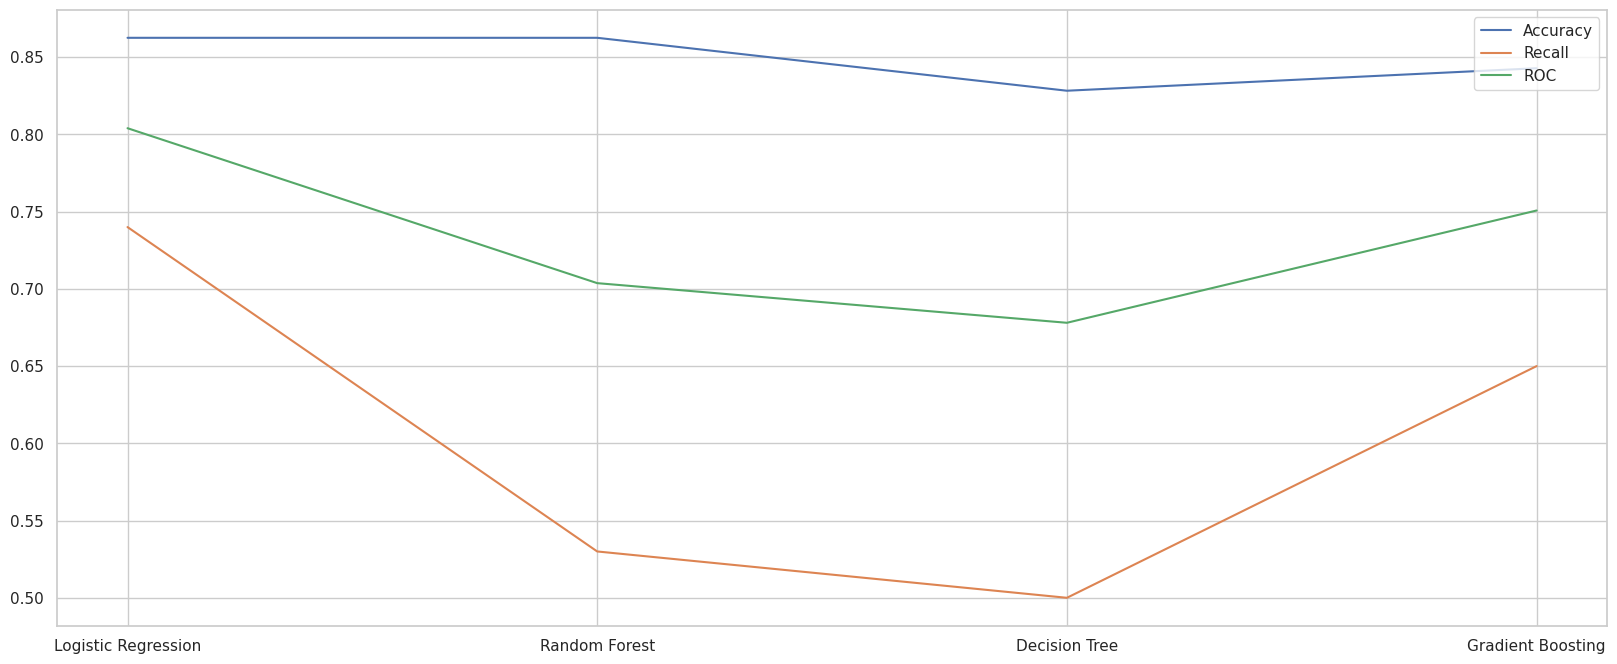

In [ ]:
## Logistic Regression model has the best performance
plt.figure(figsize=(20,8))
plt.plot(final['Model'],final[['Accuracy']])
plt.plot(final['Model'],final['Recall'])
plt.plot(final['Model'],final['ROC'])
plt.legend(['Accuracy', 'Recall', 'ROC'], loc='upper right')
plt.show()

In [13]:
df = pd.read_csv('/content/48_Industry_Portfolios_daily.CSV', skipinitialspace=True)
df = df.iloc[:24099,]
df.dropna(axis=1, how='all',inplace=True)
df.fillna(0, inplace=True)
for i in df.columns:
  df[i] = df[i].astype(float)
### We just want to use data from 20140101 - 20161231
df = df[(df['Unnamed: 0'] >= 20140101) & (df['Unnamed: 0'] <= 20170101)].reset_index(drop=True)
X = df.drop(columns=['Unnamed: 0'],axis=1)
X

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
0,-0.33,-0.90,-1.59,-1.19,-1.29,-0.81,0.34,-1.05,-1.09,-0.35,...,-0.58,-1.25,-1.03,-0.38,-0.95,-0.29,-1.30,-0.01,-0.86,-1.35
1,0.12,0.06,-0.37,0.10,-0.58,-0.60,-0.75,0.15,0.04,0.20,...,-0.24,0.75,0.19,-0.07,0.09,0.67,0.11,0.03,0.80,0.01
2,-0.62,-0.30,-0.48,-0.18,-0.79,-0.27,-0.94,-0.82,-0.23,-0.83,...,-0.22,-1.08,-0.41,-0.91,-0.85,0.16,-0.51,-0.62,-0.05,-0.90
3,-1.78,0.89,0.43,1.33,-0.16,-0.30,0.90,1.38,0.66,0.14,...,0.79,0.60,1.14,0.36,0.75,0.19,0.75,-0.75,0.17,0.12
4,1.86,-0.68,-0.98,0.40,-1.14,-0.16,1.36,-0.16,-0.93,-0.65,...,-0.24,0.33,0.77,-0.03,0.11,0.60,0.18,0.18,0.03,-0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0.25,0.20,0.20,0.07,0.04,-0.12,0.08,0.48,0.38,-0.51,...,0.35,0.14,0.45,-0.26,-0.20,0.30,0.41,-0.30,0.24,-0.08
752,0.48,0.21,0.03,0.08,0.01,-0.54,0.59,0.59,-0.10,-0.07,...,0.45,0.22,0.50,0.50,0.01,0.24,0.04,0.20,0.28,-0.06
753,-0.53,-0.57,-0.63,-0.30,-0.44,-0.57,-1.08,-1.26,-0.77,0.06,...,-1.27,-1.10,-0.92,-0.57,-0.68,-0.95,-0.91,-1.13,-1.09,-0.68
754,-0.08,0.59,0.49,0.49,0.60,0.14,-0.11,0.17,0.30,0.08,...,-0.04,-0.25,0.18,-0.22,0.02,-0.75,-0.23,0.05,-0.57,-0.10


In [16]:
### Define the functino to find the minimum variance among portfolios with weights limitation
def minimum_variance(ret):
  def find_port_variance(weights):
      cov = ret.cov()
      port_var = np.sqrt(np.dot(weights.T, np.dot(cov, weights)) * len(ret))
      return port_var

  def weight_cons(weights):
      return np.sum(weights) - 1

  ## Boundary is (-1,1) since we allow negative weights
  bounds_lim = [(-1, 1) for x in range(len(ret.columns))]
  init = [1/len(ret.columns) for i in range(len(ret.columns))]
  constraint = {'type': 'eq', 'fun': weight_cons}

  optimal = minimize(fun=find_port_variance,
                      x0=init,
                      bounds=bounds_lim,
                      constraints=constraint,
                      method='SLSQP'
                      )

  return optimal['x']

In [17]:
### Use different lengths of training data to predict next quarter, get the weights with min variance given training data and apply to the testing data
length_of_train_time_series = [len(df[df['Unnamed: 0'] <= 20140630]), len(df[df['Unnamed: 0'] <= 20140930]), len(df[df['Unnamed: 0'] <= 20141231]), len(df[df['Unnamed: 0'] <= 20150331]), len(df[df['Unnamed: 0'] <= 20150630]), len(df[df['Unnamed: 0'] <= 20150930]), len(df[df['Unnamed: 0'] <= 20151231]), len(df[df['Unnamed: 0'] <= 20160331])]
test_time_series = [df[(df['Unnamed: 0'] <= 20140930) & (df['Unnamed: 0'] >= 20140701)], df[(df['Unnamed: 0'] <= 20141231) & (df['Unnamed: 0'] >= 20141001)], df[(df['Unnamed: 0'] <= 20150331) & (df['Unnamed: 0'] >= 20150101)], df[(df['Unnamed: 0'] <= 20150630) & (df['Unnamed: 0'] >= 20150401)], df[(df['Unnamed: 0'] <= 20150930) & (df['Unnamed: 0'] >= 20150701)], df[(df['Unnamed: 0'] <= 20151231) & (df['Unnamed: 0'] >= 20151001)], df[(df['Unnamed: 0'] <= 20160331) & (df['Unnamed: 0'] >= 20160101)], df[(df['Unnamed: 0'] <= 20160630) & (df['Unnamed: 0'] >= 20160401)]]
dict_name = ['2014Q1_2014Q2_predict_2014_Q3','2014Q1_2014Q3_predict_2014_Q4','2014Q1_2014Q4_predict_2015_Q1','2014Q1_2015Q1_predict_2015_Q2','2014Q1_2015Q2_predict_2015_Q3','2014Q1_2015Q3_predict_2015_Q4','2014Q1_2015Q4_predict_2016_Q1','2014Q1_2016Q1_predict_2016_Q2']
w_train_dict = {}
min_variance_train = []
min_variance_test = []
for i in range(len(length_of_train_time_series)):
  X_temp = X.iloc[:length_of_train_time_series[i],]
  w = minimum_variance(X_temp)
  w_train_dict[dict_name[i]] = w

  cov_train = X_temp.cov()
  cov_test = test_time_series[i].drop(columns=['Unnamed: 0'],axis=1).cov()
  min_variance_train.append(np.sqrt(np.dot(w.T, np.dot(cov_train, w)) * len(X_temp)))
  min_variance_test.append(np.sqrt(np.dot(w.T, np.dot(cov_test, w)) * len(test_time_series[i])))

df_w = pd.DataFrame(w_train_dict)

[Text(0.5, 1.0, 'The optimal portfolio for different lengths of training time series')]

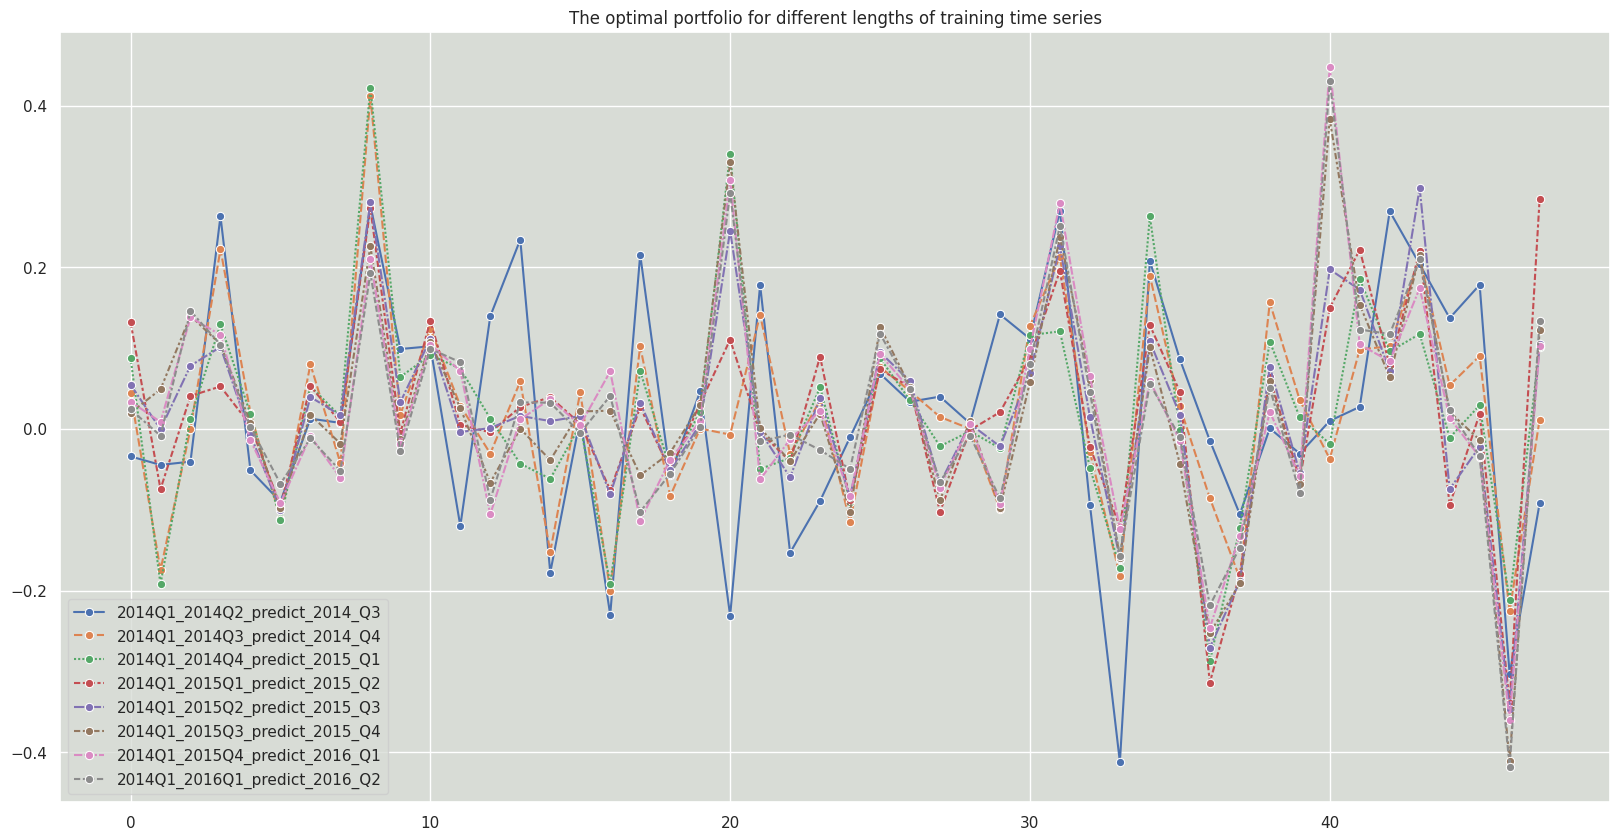

In [21]:
sns.set_style("white", {"grid.color": ".9", "grid.linestyle": ":"})
sns.set(rc = {'axes.facecolor': '#d8dcd6'})
plt.figure(figsize=(20,10))
ax = sns.lineplot(data=df_w, marker="o")
ax.set(title="The optimal portfolio for different lengths of training time series")
# plt.xticks(rotation=30)

In [ ]:
### Ridge Regression
def minimum_variance_ridge(ret, l):
  def find_port_variance(weights):
      cov = ret.cov()
      port_var = np.sqrt(np.dot(weights.T, np.dot((cov + l*np.identity(len(cov))), weights)) * len(ret))
      return port_var

  def weight_cons(weights):
      return np.sum(weights) - 1

  ## Boundary is (-1,1) since we allow negative weights
  bounds_lim = [(-1, 1) for x in range(len(ret.columns))]
  init = [1/len(ret.columns) for i in range(len(ret.columns))]
  constraint = {'type': 'eq', 'fun': weight_cons}

  optimal = minimize(fun=find_port_variance,
                      x0=init,
                      bounds=bounds_lim,
                      constraints=constraint,
                      method='SLSQP'
                      )

  result = optimal['x']

  return  result

In [ ]:
# Find minimum variance with corresponding lambda for different training set
best_lam = []
min_var = []
for i in range(len(length_of_train_time_series)):
  X_temp = X.iloc[:length_of_train_time_series[i],]
  lamb = []
  var = []
  for l in np.arange(0.0, 10.0, 0.1):
    w = minimum_variance_ridge(X_temp, l)
    lamb.append(l)
    cov_test = test_time_series[i].drop(columns=['Unnamed: 0'],axis=1).cov()
    var.append(np.sqrt(np.dot(w.T, np.dot(cov_test, w)) * len(test_time_series[i])))
  index = var.index(min(var))
  min_var.append(min(var))
  best_lam.append(lamb[index])

df_ridge = pd.DataFrame({"data": dict_name, "lambda": best_lam, "min_variance":min_var})

In [ ]:
df_ridge

,data,lambda,min_variance
0,2014Q1_2014Q2_predict_2014_Q3,0.5,3.921142
1,2014Q1_2014Q3_predict_2014_Q4,0.5,5.665058
2,2014Q1_2014Q4_predict_2015_Q1,0.4,6.014764
3,2014Q1_2015Q1_predict_2015_Q2,2.3,4.612722
4,2014Q1_2015Q2_predict_2015_Q3,0.0,8.008941
5,2014Q1_2015Q3_predict_2015_Q4,0.1,5.801701
6,2014Q1_2015Q4_predict_2016_Q1,0.0,5.148016
7,2014Q1_2016Q1_predict_2016_Q2,0.6,4.908842


In [ ]:
# Take 2014Q1_2015Q1_predict_2015_Q2 as an example for analysis
w_train_dict_ridge = {}
min_variance_train_ridge = []
min_variance_test_ridge = []
X_temp = X.iloc[:length_of_train_time_series[3],]
lam = []
for l in np.arange(0.0, 10.0, 0.1):
    w = minimum_variance_ridge(X_temp, l)

    cov_train = X_temp.cov()
    cov_test = test_time_series[3].drop(columns=['Unnamed: 0'],axis=1).cov()
    min_variance_train_ridge.append(np.dot(w.T, np.dot(cov_train, w)) * len(X_temp))
    min_variance_test_ridge.append(np.dot(w.T, np.dot(cov_test, w)) * len(test_time_series[3]))
    lam.append(l)

Text(0.5, 1.0, 'Weights of portfolios on 2014 Q1 - 2015 Q1 data based on Ridge Regularization with lambda = 2.3')

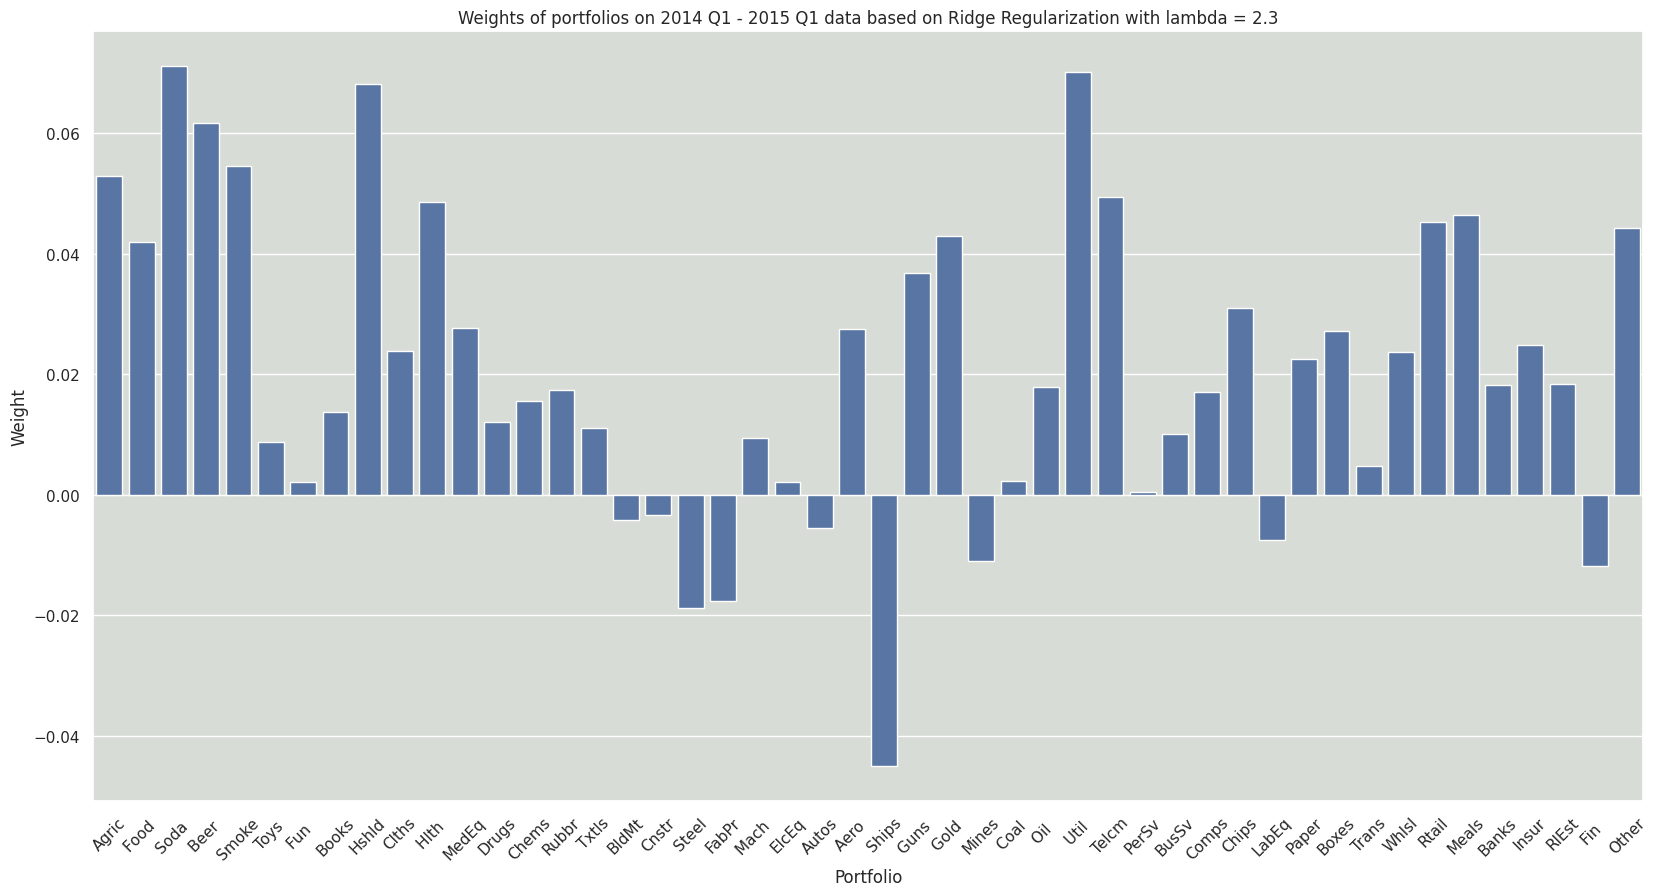

In [ ]:
# Take 2014Q1_2015Q1_predict_2015_Q2 with best lambda 2.3 as an example for analysis
w_ridge_analysis = minimum_variance_ridge(X.iloc[:length_of_train_time_series[3],], 2.3)
sns.set_style("white", {"grid.color": ".9", "grid.linestyle": ":"})
sns.set(rc = {'axes.facecolor': '#d8dcd6'})
plt.figure(figsize=(20,10))
sns.barplot(x = X.columns, y = w_ridge_analysis)
plt.xticks(rotation=45)
plt.xlabel("Portfolio")
plt.ylabel("Weight")
plt.title("Weights of portfolios on 2014 Q1 - 2015 Q1 data based on Ridge Regularization with lambda = 2.3")

<Axes: >

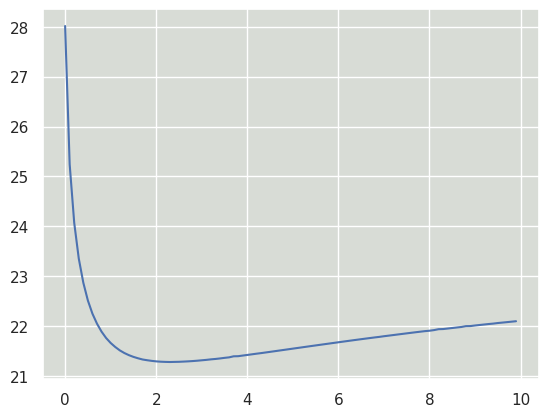

In [ ]:
# Test variance VS lambda Ridge
sns.lineplot(x=lam, y=min_variance_test_ridge)

<Axes: >

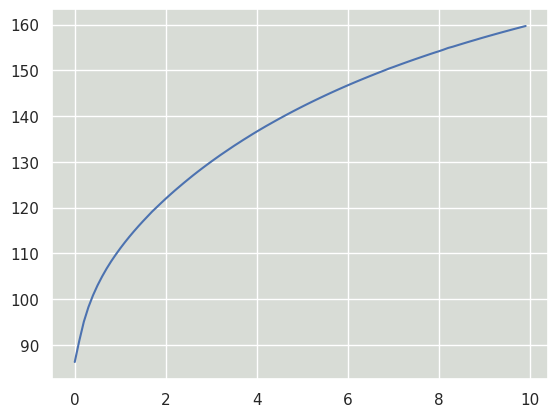

In [ ]:
# Train variance VS lambda Ridge
sns.lineplot(x=lam, y=min_variance_train_ridge)

In [ ]:
### Lasso Regression
def minimum_variance_lasso(ret, l):
  def find_port_variance(weights):
      cov = ret.cov()
      port_var = np.sqrt((np.dot(weights.T, np.dot(cov, weights)) + l*sum([abs(ele) for ele in weights])) * len(ret))
      return port_var

  def weight_cons(weights):
      return np.sum(weights) - 1

  ## Boundary is (-1,1) since we allow negative weights
  bounds_lim = [(-1, 1) for x in range(len(ret.columns))]
  init = [1/len(ret.columns) for i in range(len(ret.columns))]
  constraint = {'type': 'eq', 'fun': weight_cons}

  optimal = minimize(fun=find_port_variance,
                      x0=init,
                      bounds=bounds_lim,
                      constraints=constraint,
                      method='SLSQP'
                      )

  result = optimal['x']

  return  result

In [ ]:
# Find minimum variance with corresponding lambda for different training set
best_lam = []
min_var = []
for i in range(len(length_of_train_time_series)):
  X_temp = X.iloc[:length_of_train_time_series[i],]
  lamb = []
  var = []
  for l in np.arange(0.0, 10.0, 0.1):
    w = minimum_variance_lasso(X_temp, l)
    lamb.append(l)
    cov_test = test_time_series[i].drop(columns=['Unnamed: 0'],axis=1).cov()
    var.append(np.sqrt(np.dot(w.T, np.dot(cov_test, w)) * len(test_time_series[i])))
  index = var.index(min(var))
  min_var.append(min(var))
  best_lam.append(lamb[index])

df_lasso = pd.DataFrame({"data": dict_name, "lambda": best_lam, "min_variance":min_var})

In [ ]:
df_lasso

Text(0.5, 1.0, 'Weights of portfolios on 2014 Q1 - 2015 Q1 data based on Lasso Regularization with lambda = 2')

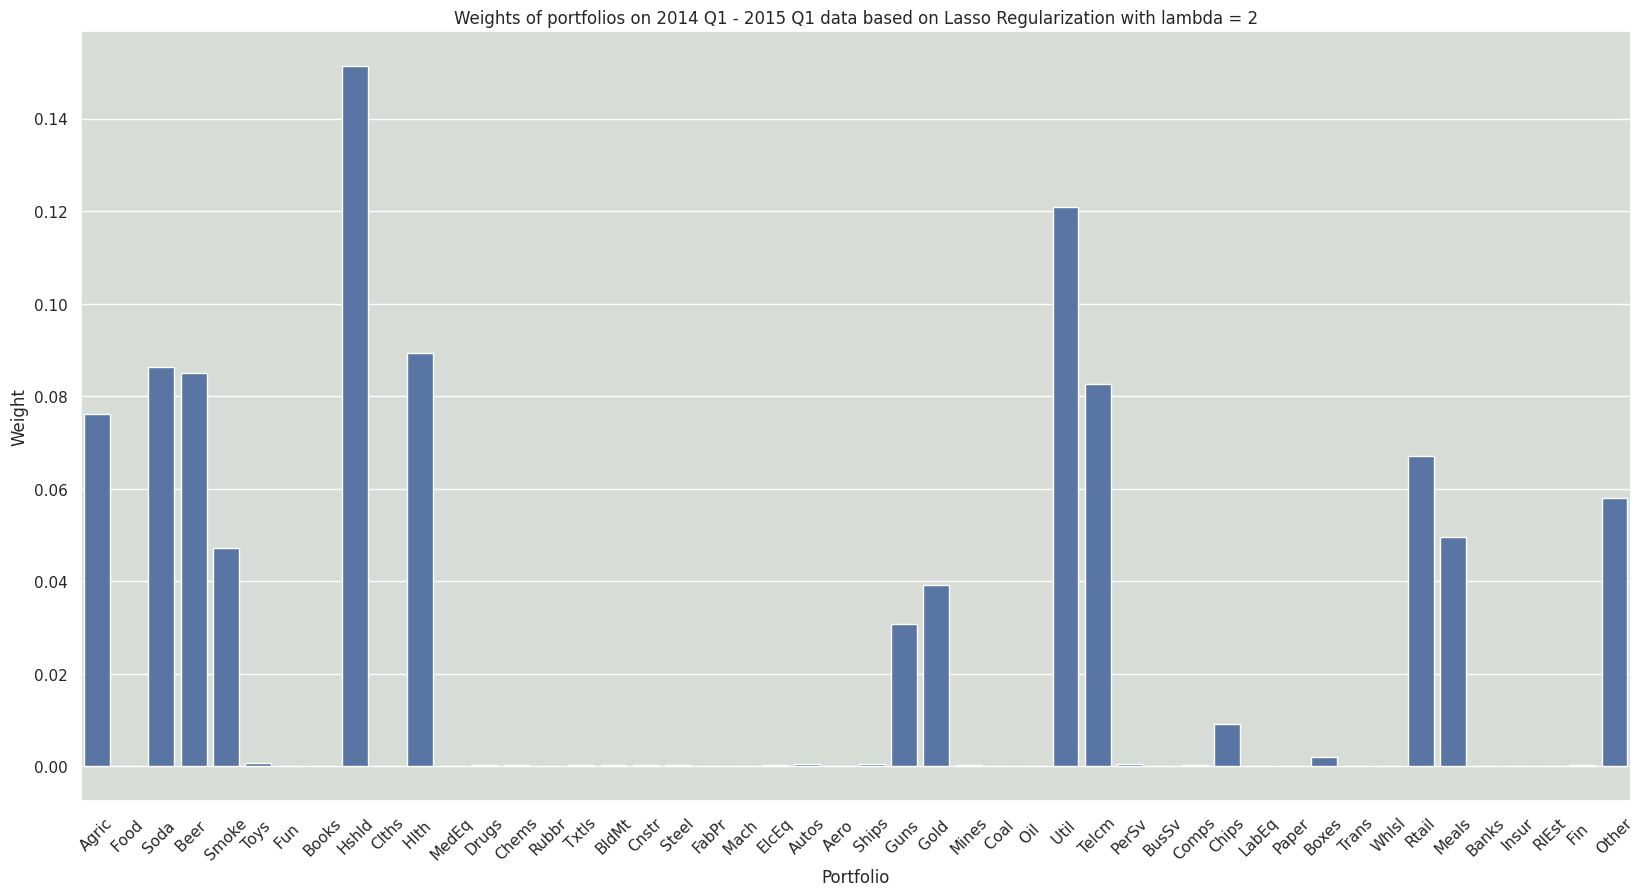

In [ ]:
# Take 2014Q1_2015Q1_predict_2015_Q2 with best lambda 2.3 as an example for analysis
w_lasso_analysis = minimum_variance_lasso(X.iloc[:length_of_train_time_series[3],], 2)
sns.set_style("white", {"grid.color": ".9", "grid.linestyle": ":"})
sns.set(rc = {'axes.facecolor': '#d8dcd6'})
plt.figure(figsize=(20,10))
sns.barplot(x = X.columns, y = w_lasso_analysis)
plt.xticks(rotation=45)
plt.xlabel("Portfolio")
plt.ylabel("Weight")
plt.title("Weights of portfolios on 2014 Q1 - 2015 Q1 data based on Lasso Regularization with lambda = 2")

In [ ]:
# Take 2014Q1_2015Q1_predict_2015_Q2 as an example for analysis
w_train_dict_lasso = {}
min_variance_train_lasso = []
min_variance_test_lasso = []
X_temp = X.iloc[:length_of_train_time_series[3],]
lam = []
for l in np.arange(0.0, 10.0, 0.1):
    w = minimum_variance_lasso(X_temp, l)

    cov_train = X_temp.cov()
    cov_test = test_time_series[3].drop(columns=['Unnamed: 0'],axis=1).cov()
    min_variance_train_lasso.append(np.dot(w.T, np.dot(cov_train, w)) * len(X_temp))
    min_variance_test_lasso.append(np.dot(w.T, np.dot(cov_test, w)) * len(test_time_series[3]))
    lam.append(l)

<Axes: >

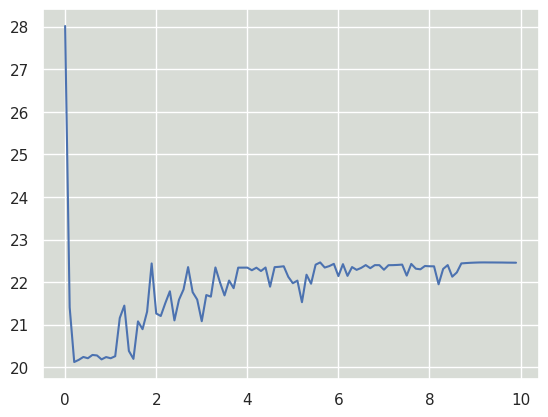

In [ ]:
# Test variance VS lambda Lasso
sns.lineplot(x=lam, y=min_variance_test_lasso)

<Axes: >

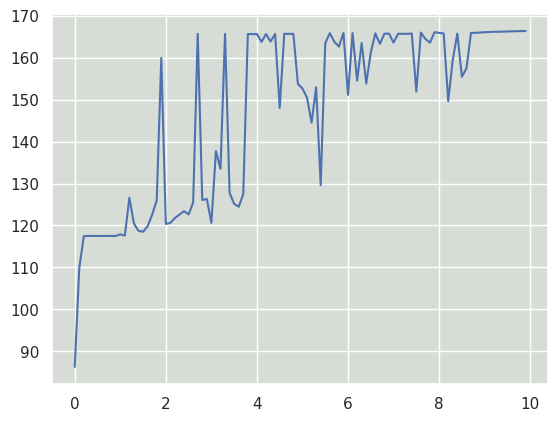

In [ ]:
# Train variance VS lambda Lasso
sns.lineplot(x=lam, y=min_variance_train_lasso)

In [14]:
### Define the functino to find the minimum variance among portfolios with weights limitation (-1, 1)
def minimum_variance_with_ban_on_short_selling(ret):
  def find_port_variance(weights):
      cov = ret.cov()
      port_var = np.sqrt(np.dot(weights.T, np.dot(cov, weights)) * len(ret))
      return port_var

  def weight_cons(weights):
      return np.sum(weights) - 1

  ## Boundary is (0,1) since we ban the short selling
  bounds_lim = [(0, 1) for x in range(len(ret.columns))]
  init = [1/len(ret.columns) for i in range(len(ret.columns))]
  constraint = {'type': 'eq', 'fun': weight_cons}

  optimal = minimize(fun=find_port_variance,
                      x0=init,
                      bounds=bounds_lim,
                      constraints=constraint,
                      method='SLSQP'
                      )

  return optimal['x']

In [22]:
### Use different lengths of training data to predict next quarter, get the weights with min variance given training data and apply to the testing data (ban on short selling)
w_train_ban_dict = {}
min_variance_ban_train = []
min_variance_ban_test = []
for i in range(len(length_of_train_time_series)):
  X_temp = X.iloc[:length_of_train_time_series[i],]
  w = minimum_variance_with_ban_on_short_selling(X_temp)
  w_train_ban_dict[dict_name[i]] = w

  cov_train = X_temp.cov()
  cov_test = test_time_series[i].drop(columns=['Unnamed: 0'],axis=1).cov()
  min_variance_ban_train.append(np.sqrt(np.dot(w.T, np.dot(cov_train, w)) * len(X_temp)))
  min_variance_ban_test.append(np.sqrt(np.dot(w.T, np.dot(cov_test, w)) * len(test_time_series[i])))

df_w_ban = pd.DataFrame(w_train_ban_dict)